<a href="https://colab.research.google.com/github/SarangGami/Capstone-EDA-project-1-Airbnb-bookings-analysis/blob/main/Analysis_(SG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

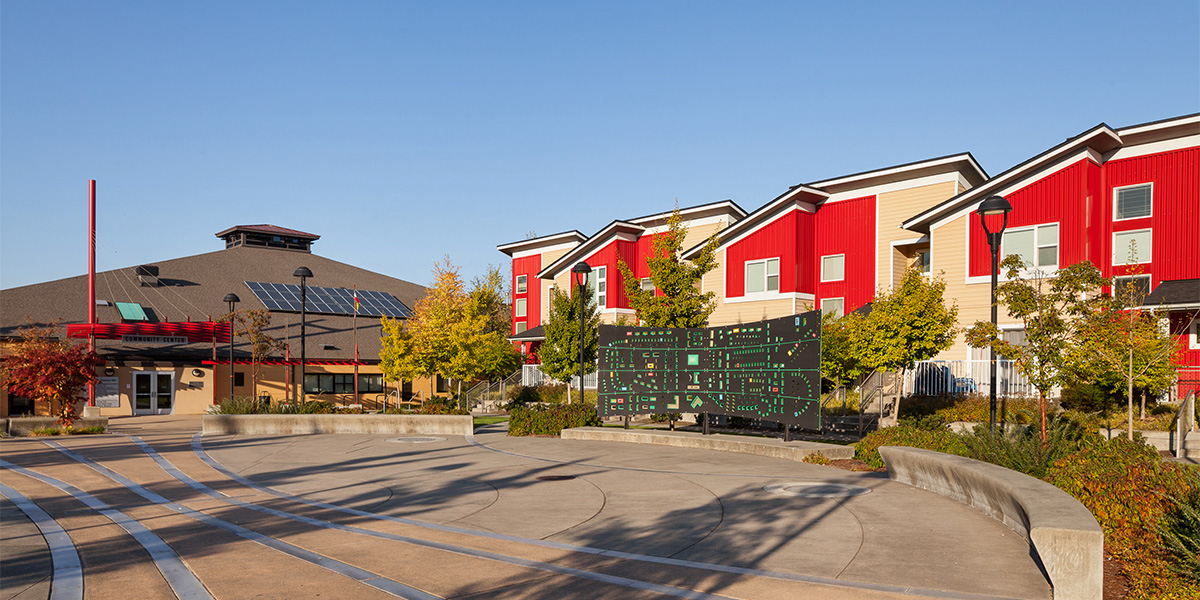

In [1]:
from PIL import Image
from IPython.display import display
img = Image.open('images/kghd.jpeg' )
display(img)

In [2]:
### **Importing necessary libraries**

import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import missingno as msno
from sklearn.preprocessing import LabelEncoder 
from IPython.display import Image

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (10, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# save figures in folder
#IMAGES_PATH = Path() / "images1" / "end_to_end_project"
#IMAGES_PATH.mkdir(parents=True, exist_ok=True)

#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
   # if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
## Loading housing dataset**
df = pd.read_csv('data/df_cleaned.csv')
df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   
0     3.000      2.250     2570.000  7242.000   2.000       0.000 0.000  \
1     2.000      1.000      770.000 10000.000   1.000       0.000 0.000   
2     4.000      3.000     1960.000  5000.000   1.000       0.000 0.000   
3     3.000      2.000     1680.000  8080.000   1.000       0.000 0.000   
4     3.000      1.000     1780.000  7470.000   1.000       0.000 0.000   

   condition  grade  sqft_above  sqft_basement  yr_built  zipcode    lat   
0          3      7    2170.000        400.000      1951    98125 47.721  \
1          3      6     770.000          0.000      1933    98028 47.738   
2          5      7    1050.000        910.000      1965    98136 47.521   
3          3      8    1680.000          0.000      1987    98074 47.617   
4          3      7    1050.000        730.000      1960    98146 47.512   

      long  sqft_living15  sqft_lot15      price  
0 -122.319       1690.000    7639.000 538000.000  
1 -122.233       2720.000    8062.000 180000.000  
2 -122.393       1360.000    5000.000 604000.000  
3 -122.045       1800.000    7503.000 510000.000  
4 -122.337       1780.000    8113.000 229500.000

In [5]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

(1) Distribution of data 

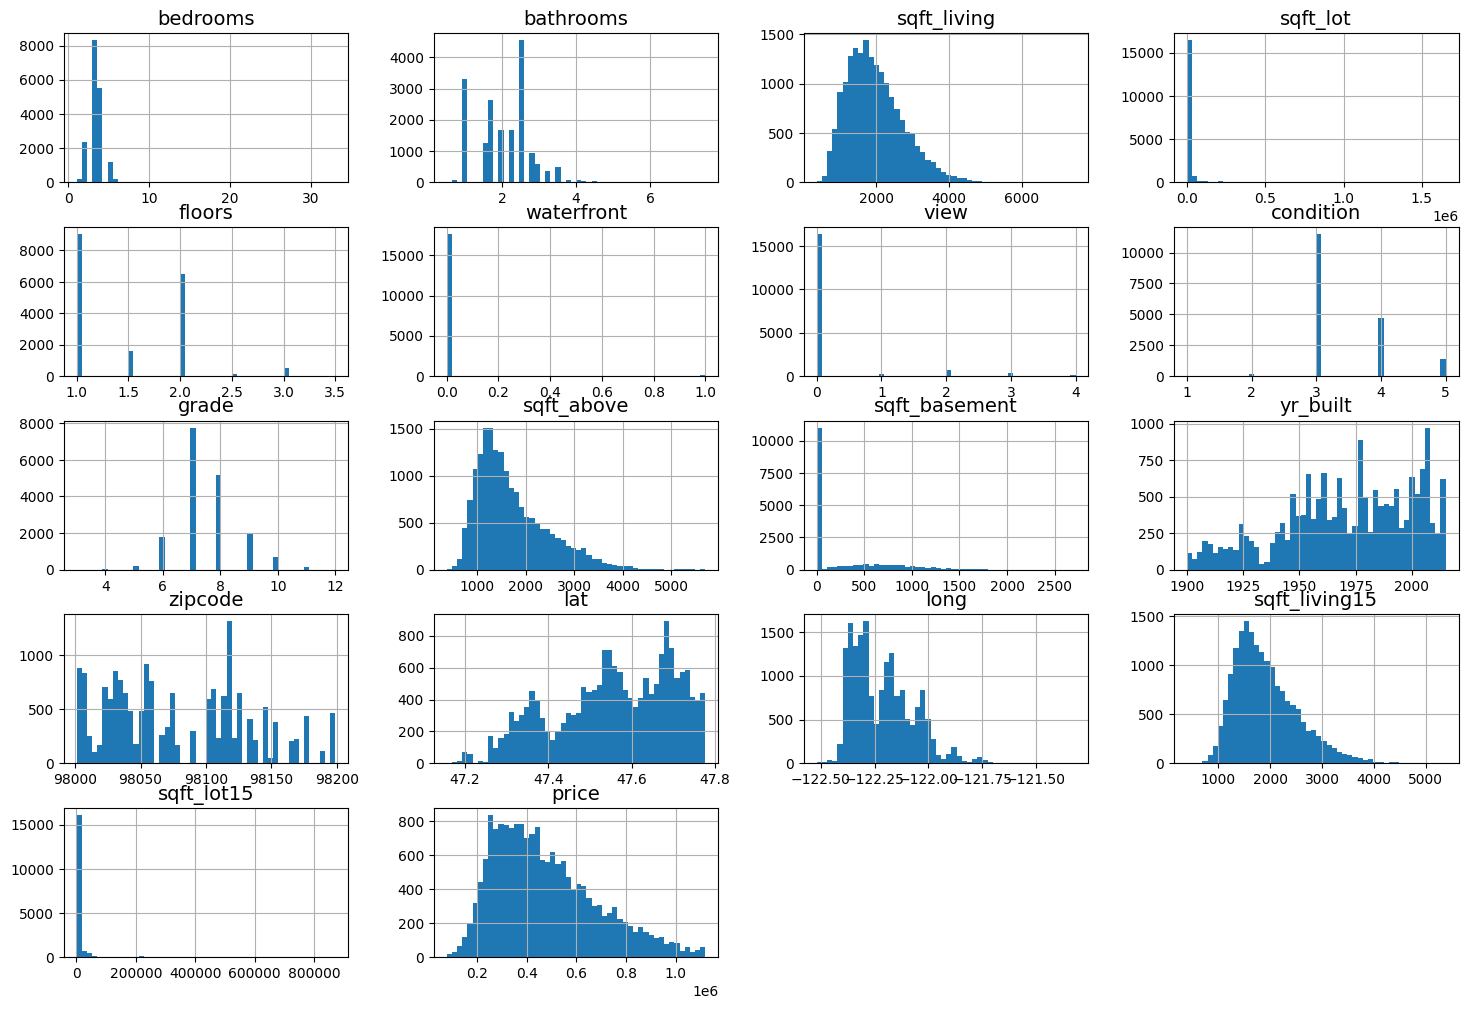

In [6]:
# For histogram following columns were chosen
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.hist(bins=50, figsize=(18, 12))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

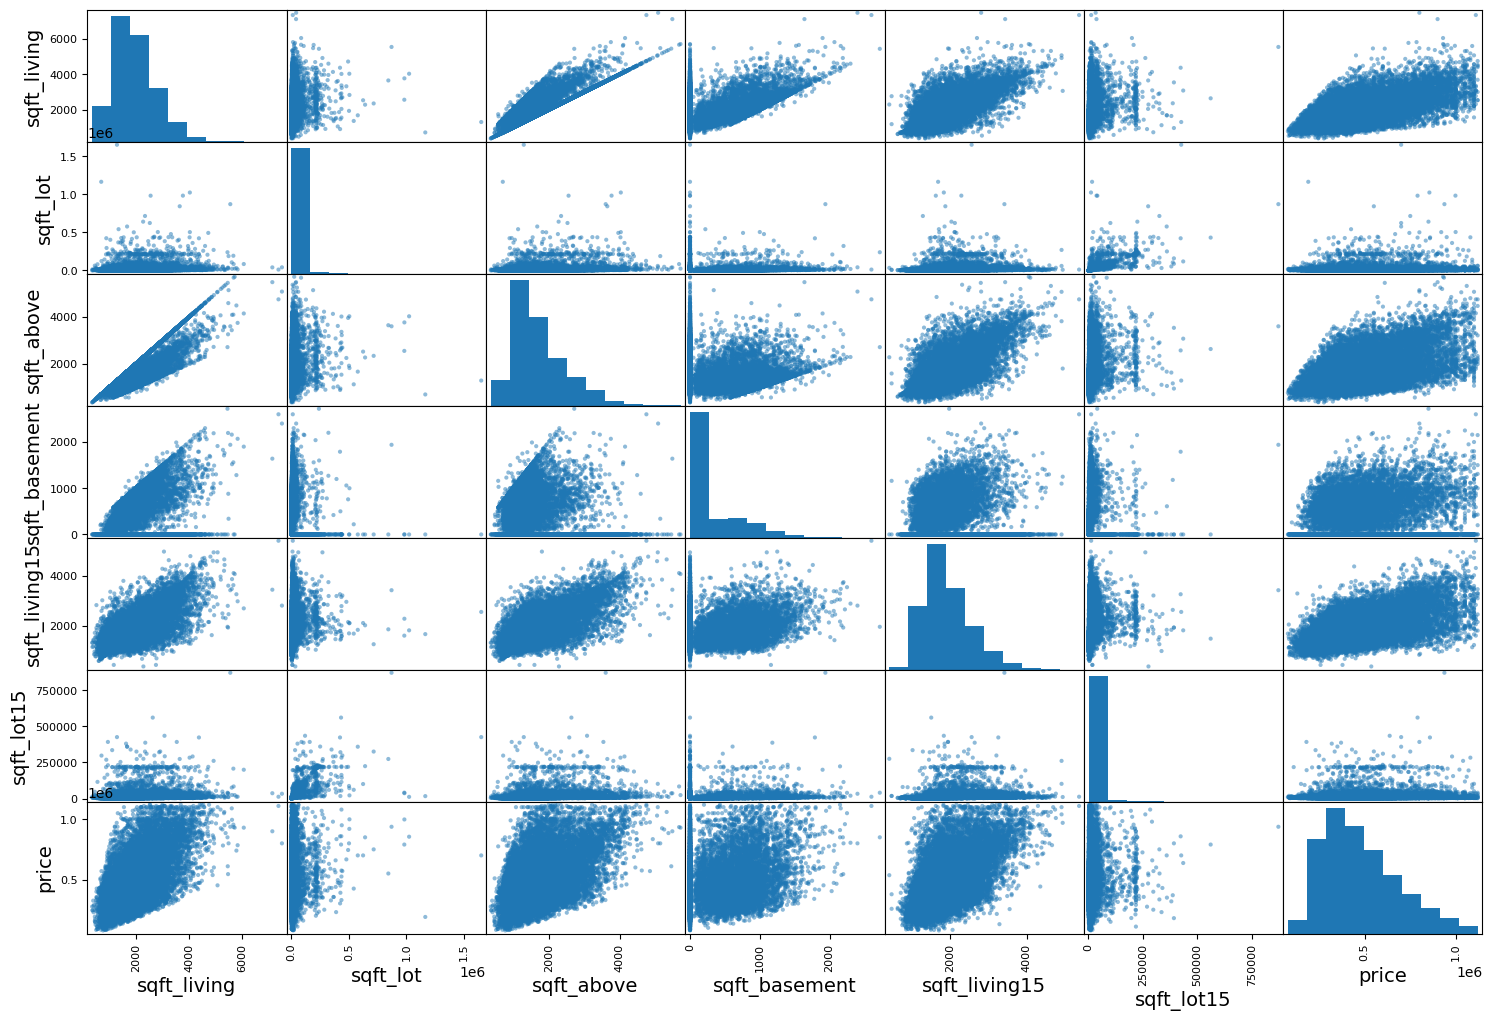

In [7]:
import seaborn as sns
from pandas.plotting import scatter_matrix

attributes = ['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'price']

scatter_matrix(df[attributes], figsize=(18, 12))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()


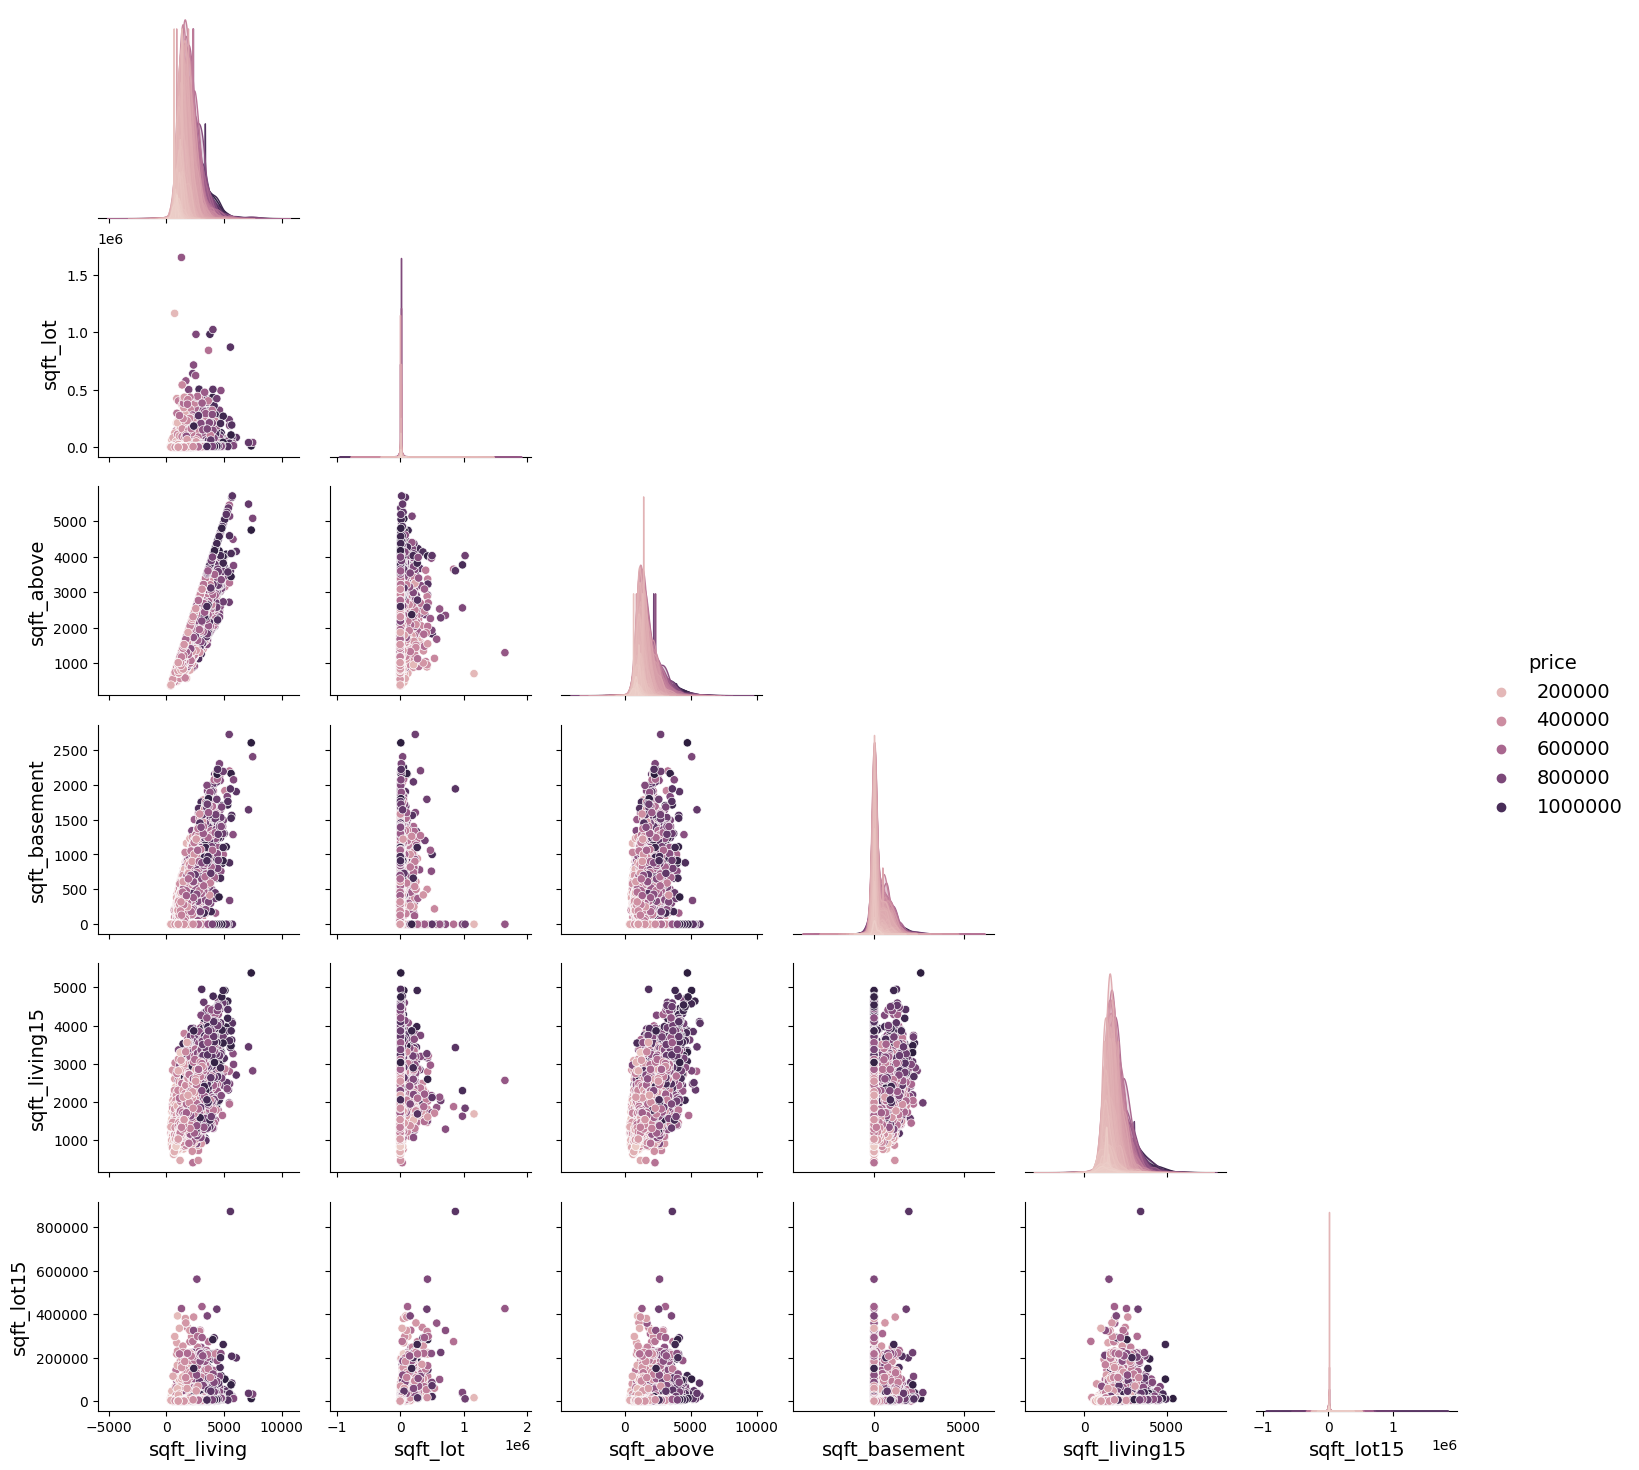

In [8]:
g = sns.pairplot(df[attributes], hue="price", corner=True)
plt.show()


(2) Correlation matrix to determine corelation between features

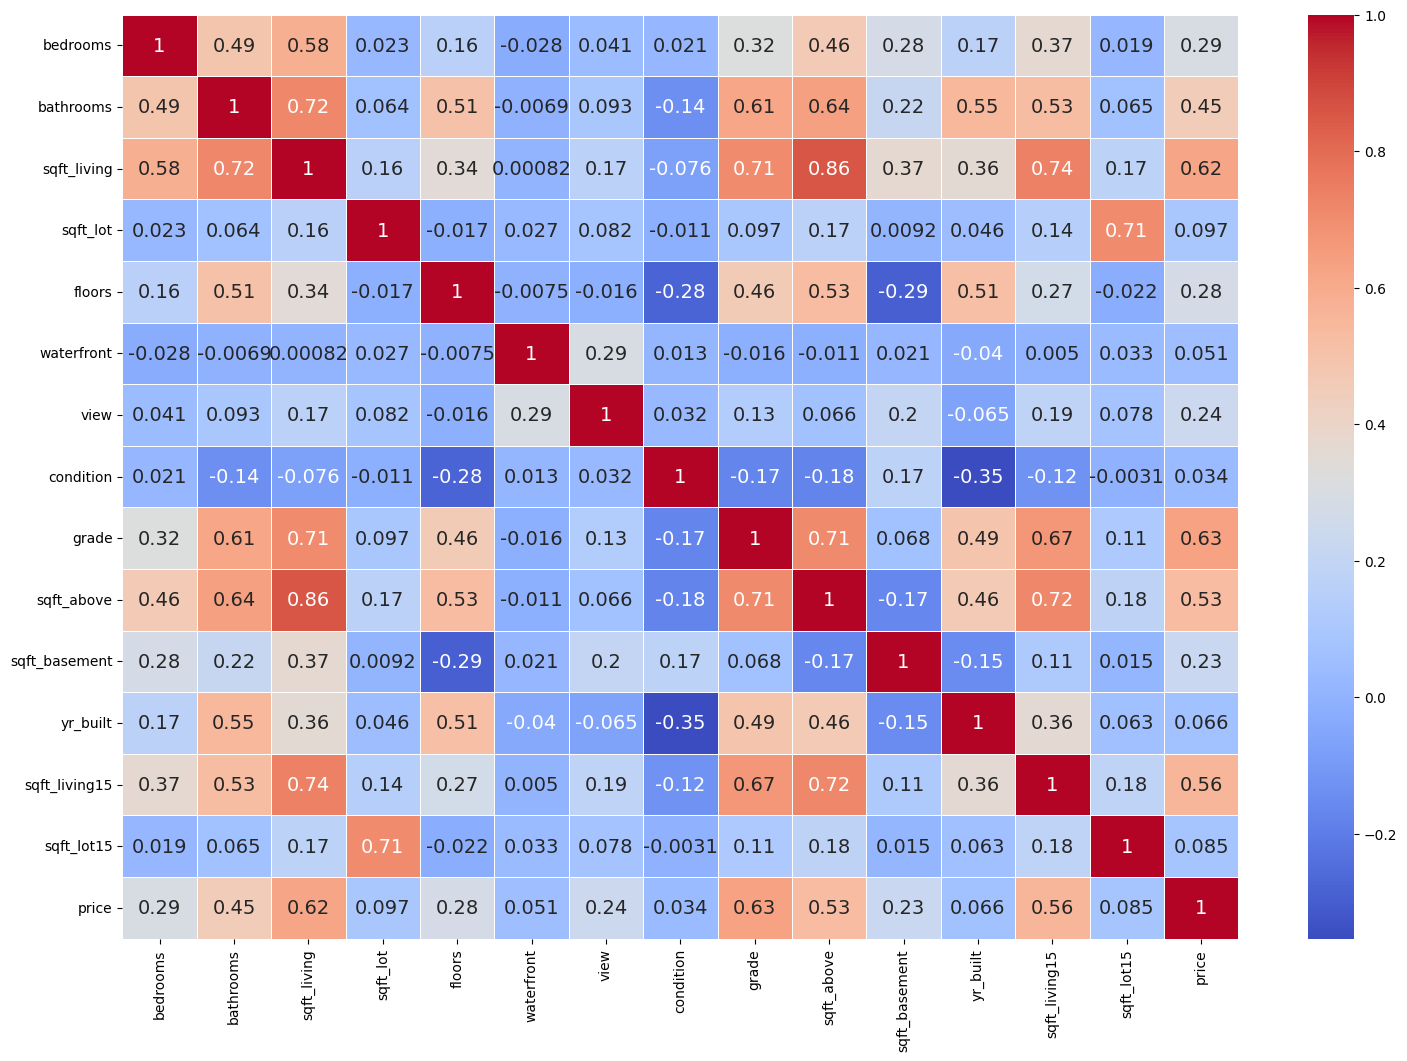

In [9]:
# check for correlations between different features

corr_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'price']

corr_mtrx = df[corr_columns].corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax = sns.heatmap(corr_mtrx, linewidths=0.5, annot=True, cmap= 'coolwarm')

#Price is highly correlated with sq living, (and also other area related features such as sq above, sqft_living15 ), and grade, sq_above

Observations

*   There is a high positive linear correlation  between the price and area (sq_living ) (0.62). The other area-related columns (sqft_above, sq_living15 ) are also positively correlated with price.

*  The price is positively correlated with grade (0.63), and number of bathrooms (0.45), suggests that the properties with higher grades and number of bathrooms tend to be expensive.

* There is negative correlation between condition and yr_built, suggests that properties which are old, have poor conditions.

* Area related columns such as sqft_living and sq_living15, sq_lot and sq_lot15, are positively correlated to each other.

(2) Relationship between between city center and waterfront, isolated neighbourhood (sqft15) and housing prices

In [10]:
# Create a new column 'city_neighbourhood' and assign default value as 'countryside'
df['city_neighbourhood'] = 0
zip_city = (98188,98199,98174,98154,98158,98164,98101,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98121,98122,98125,98126,98133,98134,98136,
      3, 98144)
# Update the 'city_neighbourhood' column based on the condition
df.loc[df['zipcode'].isin(zip_city), 'city_neighbourhood'] = 1

In [11]:
summary1 = df.groupby('city_neighbourhood')['price'].agg(['mean', 'std']).reset_index()
summary2 = df.groupby('waterfront')['price'].agg(['mean', 'std']).reset_index()

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd
# Create Subplots
fig = make_subplots(rows=1, cols=3)

# Plot using Plotly Express in Subplot 1
fig.add_trace(px.bar(summary1, x='city_neighbourhood', y='mean', error_y='std').data[0], row=1, col=1)
custom_labels = ['countryside', 'city_neighbourhood']
custom_tickvals = list(range(0, 2))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels,title_text = '', row=1, col=1)
fig.update_yaxes(title_text='Average price ($)', row=1, col=1)
#fig.update_layout(title_text='Mean ± SD price for houses', title_x=0.1, width=1200)



# Plot using Plotly Express in Subplot 2
fig.add_trace(px.bar(summary2, x='waterfront', y='mean', error_y='std').data[0], row=1, col=2)
# Update Subplot 2
custom_labels = ['no_waterfront', 'waterfront']
custom_tickvals = list(range(0, 2))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels,title_text = '', row=1, col=2)
fig.update_yaxes(title_text='Average price ($)', row=1, col=2)
#fig.update_layout(title_text='Mean ± SD price for houses', title_x=0.5, width=1200)



# Plot using Plotly Express in Subplot 3
fig.add_trace(px.scatter(df, x='sqft_living',y='price').data[0], row=1, col=3)
custom_labels = ['']
custom_tickvals = list(range(0, 2))
fig.update_xaxes(tickvals=custom_tickvals, ticktext=custom_labels,title_text = 'sqft living', row=1, col=3)
fig.update_yaxes(title_text='Price ($)', row=1, col=3)

fig.update_layout( title_x=0.05, width=1200)

# Show Plot
fig.show()


Observations

*  In general, the houses on the countryside are cheaper than city center.
*  Properties with no waterfront are less expensive.
*  As the supply of water-front properties is less, I suggest that the annotation of waterfront properties should be re-confirmed.

(3) Recommendations for Lary Sanders

count     17711.000
mean     476615.659
std      207401.361
min       78000.000
25%      315000.000
50%      438000.000
75%      600000.000
max     1120000.000
Name: price, dtype: float64


<Figure size 400x200 with 0 Axes>

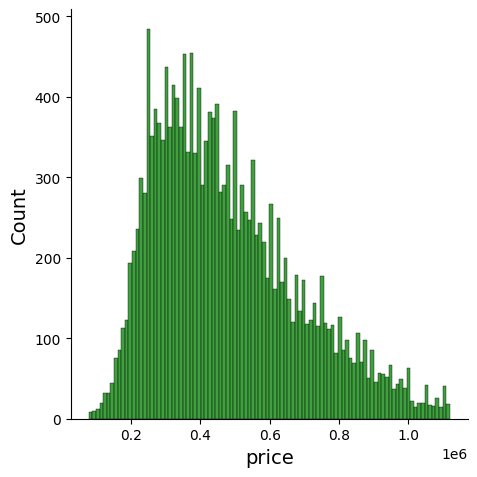

In [13]:
print(df['price'].describe())
plt.figure(figsize=(4, 2))
sns.displot(df['price'], color='g', bins=100, )

In [14]:
#housing["income_cat"] = pd.cut(housing["median_income"],
 #                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
  #                             labels=[1, 2, 3, 4, 5])

In [15]:
# create a new DataFrame that displays the average price of housing in each zip code
zipcode_avg_price = df.groupby("zipcode").mean().reset_index().rename(columns={"price": "avg_price"})[['zipcode', 'avg_price']]

# select the top 10 neighborhoods with the lowest average prices
zipcode_avg_price = zipcode_avg_price.sort_values("avg_price").head(10)
zipcode_avg_price

## For purchasers on a tight budget, properties in these zip codes are generally recommended.

zipcode  avg_price
1     98002 234568.416
64    98168 246465.113
20    98032 250652.239
0     98001 278969.868
13    98023 282077.121
61    98148 288536.800
67    98188 289031.652
2     98003 289457.462
18    98030 295387.437
68    98198 295467.552

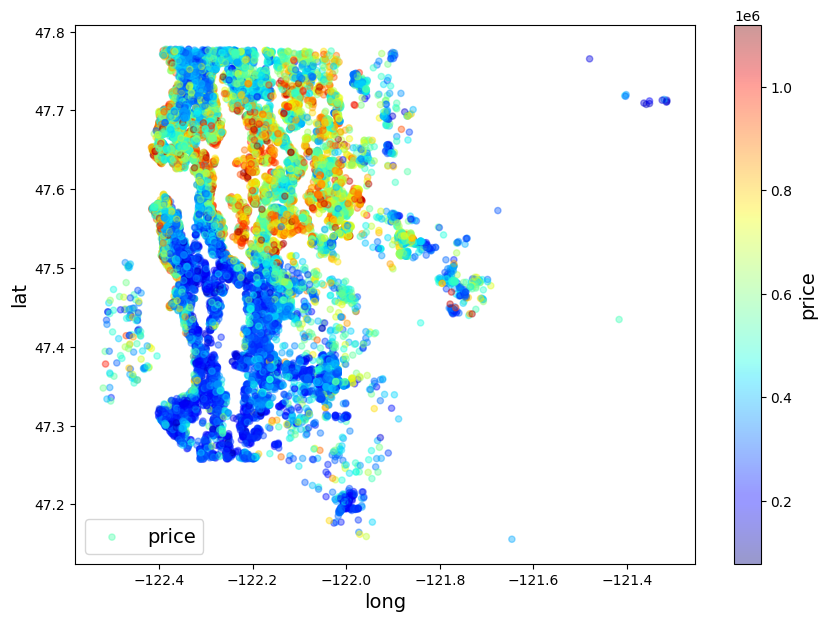

In [16]:
# the trend of prices along different geo-locations was checked
df.plot(kind="scatter", x="long", y="lat", alpha=0.4,
             #s=df["price"]/10000, 
             label="price", figsize=(10,7),
             c="price", 
             cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

# Properties surrounded by waterbodies are more costly than those by the sea.

In [17]:
import plotly.express as px
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='long',
    #hover_name='waterfront', 
    #hover_data='price', # Assuming you have an 'address' column for house addresses
    color_discrete_sequence=['#B5838D'],  # Point color for houses
    size_max=15,  # Max size of points, adjust as needed
    zoom=8.55,  # Zoom level to focus on Seattle
    center={"lat": 47.45, "lon": -122.10},  # Centers the map
    title='Houses in and around Seattle',
    mapbox_style="open-street-map"  # Use OpenStreetMap style
   
)
# Adjusting the size of the plot
fig.update_layout(width=1000, height=500)  # Set the width and height as desired
fig.show()

In [18]:
# The following is the initial recommendation for Lary. This filter will display houses on the waterfront and in city neighborhoods.

filtered_df1 = df.loc[(df['bedrooms'] > 3) & (df['bathrooms'] > 2) & (df['waterfront'] == 1) & (df['city_neighbourhood'] == 1)]
filtered_df1.head()
# This search resulted 1 property.

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   
6719     5.000      2.500     2340.000  1989.000   2.000       1.000 4.000  \

      condition  grade  sqft_above  sqft_basement  yr_built  zipcode    lat   
6719          3      8    2340.000          0.000      1959    98118 47.519  \

         long  sqft_living15  sqft_lot15      price  city_neighbourhood  
6719 -122.257       2200.000    3230.000 949950.000                   1

In [19]:
# The second recommendation is to look for water-front properties in countryside.
filtered_df2 = df.loc[(df['bedrooms'] > 3) & (df['bathrooms'] > 2) & (df['waterfront'] == 1)& (df['city_neighbourhood'] == 0)]
filtered_df2.head()
#filtered_df2.shape 

# This search resulted 4 properties

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   
2660      5.000      4.500     2120.000  8944.000   2.000       1.000 4.000  \
4721      4.000      3.250     3190.000 11774.000   2.000       1.000 4.000   
12656     4.000      2.250     2290.000 12174.000   1.000       1.000 4.000   
14698     6.000      2.750     2520.000 54160.000   2.000       1.000 4.000   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode    lat   
2660           5      8    2120.000          0.000      1939    98006 47.549  \
4721           3      8    2610.000        580.000      1956    98178 47.503   
12656          3      7    1490.000        800.000      1948    98178 47.511   
14698          3      7    2520.000          0.000      1954    98146 47.497   

          long  sqft_living15  sqft_lot15       price  city_neighbourhood  
2660  -122.197       2870.000    8944.000 1000000.000                   0  
4721  -122.225       2240.000    8725.000 1100000.000                   0  
12656 -122.245       2290.000    9379.000  840500.000                   0  
14698 -122.376       2790.000   26809.000  975000.000                   0

Business conclusions

*  The range of prices for houses in Seattle is wide from 78 k till 112 k. 
*  The most expensive houses could be  due to its various attractive amenities,  waterfront, and city neighbourhood.
*  Properties surrounded by waterbodies are more costly than those by the sea.
*  In  the house plans, number of bathrooms plays major role in deciding price, over total number of bedrooms.
*  Many older properties are possibly not renovated, and in poor condition.


